In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import vgg16, InceptionV3

In [3]:
# from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# #from keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
# from tensorflow.keras.models import Sequential

In [4]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'TomatoDataset/train'
valid_path = 'TomatoDataset/test'

In [5]:
# Import the Inception v3 library as shown below and add preprocessing layer to the front
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# dont train the existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('TomatoDataset/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('TomatoDataset/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [16]:
test_set = test_datagen.flow_from_directory('TomatoDataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rohan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 261s 435ms/step - loss: 2.9241 - accuracy: 0.6865 - val_loss: 2.4656 - val_accuracy: 0.7241
Epoch 2/10
574/574 [==============================] - 157s 273ms/step - loss: 2.0655 - accuracy: 0.7957 - val_loss: 2.1277 - val_accuracy: 0.8013
Epoch 3/10
574/574 [==============================] - 161s 280ms/step - loss: 2.0808 - accuracy: 0.8166 - val_loss: 1.8244 - val_accuracy: 0.8386
Epoch 4/10
574/574 [==============================] - 162s 283ms/step - loss: 1.9688 - accuracy: 0.8380 - val_loss: 2.7172 - val_accuracy: 0.8026
Epoch 5/10
574/574 [==============================] - 163s 284ms/step - loss: 1.8838 - accuracy: 0.8535 - val_loss: 1.7206 - val_accuracy: 0.8628
Epoch 6/10
574/574 [==============================] - 166s 288ms/step - loss: 1.8260 - accuracy: 0.8694 - val_loss: 3.4906 - val_accuracy: 0.8157
Epoch 7/10
574/574 [==============================] - 159s 277ms/step - loss: 1.9338 - accuracy: 0.8661 - val_loss: 3.3662 -

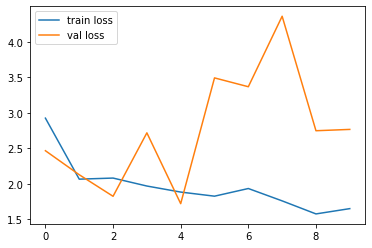

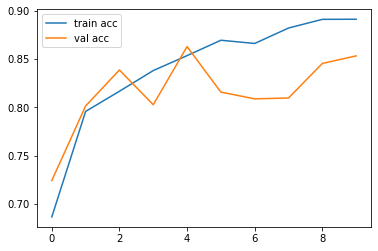

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# The code after this cell is just for some testing and playing around

In [19]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [20]:
y_pred = model.predict(test_set)
y_pred

array([[0.0000000e+00, 0.0000000e+00, 8.8752357e-09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0885228e-34, 2.3106196e-32, 3.9515139e-17, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 9.6792444e-25, 7.3942785e-36, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0534341e-25, 5.7864424e-22, 2.0161224e-17, ..., 0.0000000e+00,
        7.6210288e-12, 0.0000000e+00],
       [0.0000000e+00, 1.5976757e-26, 4.9042095e-18, ..., 0.0000000e+00,
        4.1006562e-32, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        3.9820632e-33, 0.0000000e+00]], dtype=float32)

In [21]:
y_preds = np.argmax(y_pred, axis=1)
y_preds

array([3, 5, 0, ..., 5, 9, 7], dtype=int64)

In [22]:
#now we read the image and predict the outcome of the image given

from tensorflow.keras.models import load_model
model = load_model("model_inception.h5")

In [38]:
from tensorflow.keras.preprocessing import image
img=image.load_img('TomatoDataset/test/Tomato___Late_blight/0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985_flipLR.jpg',target_size=(224,224))

In [39]:
#Now we need to convert the image into an array for the model to be able to read it
x = image.img_to_array(img)
x

array([[[183., 165., 155.],
        [162., 144., 134.],
        [178., 160., 150.],
        ...,
        [220., 205., 202.],
        [216., 201., 198.],
        [209., 194., 191.]],

       [[191., 173., 163.],
        [174., 156., 146.],
        [184., 166., 156.],
        ...,
        [219., 204., 201.],
        [216., 201., 198.],
        [210., 195., 192.]],

       [[158., 140., 130.],
        [159., 141., 131.],
        [173., 155., 145.],
        ...,
        [218., 203., 200.],
        [216., 201., 198.],
        [213., 198., 195.]],

       ...,

       [[143., 124., 117.],
        [195., 176., 169.],
        [166., 147., 140.],
        ...,
        [207., 193., 190.],
        [207., 193., 190.],
        [207., 193., 190.]],

       [[143., 124., 117.],
        [163., 144., 137.],
        [155., 136., 129.],
        ...,
        [204., 190., 187.],
        [204., 190., 187.],
        [204., 190., 187.]],

       [[136., 117., 110.],
        [111.,  92.,  85.],
        [156., 1

In [40]:
x.shape
#We do this step to rescale in the same way we divided our test_datagen and train_datagen by 255
x=x/255

In [41]:
#Now we expand the dimensions of this image for it to be of the same shape
x = np.expand_dims(x, axis=0)
#If in case you run line 2 more than once the shape will change with 1 more dimension every time
#To fix this use "squeeze" in place of "expand_dims" and run and check the final shape of image
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [42]:
model.predict(img_data)

array([[2.9093653e-17, 3.0951629e-08, 1.0000000e+00, 3.5157147e-10,
        8.9830532e-10, 3.6275659e-13, 1.1259533e-14, 6.7876543e-27,
        1.7630064e-11, 4.5158376e-16]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2], dtype=int64)

In [46]:
 1.0000000e+00

1.0